# **Dimensionality and Network Complexity**
This Python script evaluates the impact of dimensionality reduction and network pruning on computational efficiency and model performance, particularly on the MNIST dataset. Dimensionality reduction is implemented using Principal Component Analysis (PCA) and autoencoders, both of which aim to reduce input data dimensions while retaining essential information. PCA reduces the 784-dimensional MNIST feature space to a lower-dimensional representation, retaining 80% of the variance and speeding up training. Autoencoders complement this by learning non-linear latent representations, capturing more complex patterns that enhance cluster separability for classification tasks.

The script also applies network pruning to reduce the number of model parameters. Using L1 unstructured pruning, weights with minimal impact are removed, and fine-tuning is employed to recover performance. This approach significantly improves inference speed without major accuracy losses. Combined with regularization techniques like weight decay and dropout, pruning ensures the pruned models remain robust and generalizable. Comparisons across baseline, PCA, autoencoder, and pruned models are visualized in terms of training time and accuracy, demonstrating the complementary benefits of these optimization techniques for scalable and resource-efficient neural networks.

Preparing MNIST dataset...
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.01MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Defining neural networks...
Preparing PCA-based model...
Applying PCA to retain 80% of variance...
PCA retained 44 components (explained variance ratio: 0.80)
Preparing Autoencoder-based model...
Training Autoencoder for 10 epochs...
Autoencoder training complete. Final loss: 0.8737
Extracting latent representations using Autoencoder...
Extracting latent representations using Autoencoder...
Training and evaluating the baseline model...
Training the model...


<ipython-input-1-864550a83b84>:239: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(train_data[i:i+128]).float().to(device)
<ipython-input-1-864550a83b84>:240: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(train_labels[i:i+128]).long().to(device)


Training complete in 8.02 seconds.
Evaluating the model...
Model accuracy: 94.69%
Training and evaluating the PCA model...
Training the model...


<ipython-input-1-864550a83b84>:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(test_data).float().to(device)
<ipython-input-1-864550a83b84>:266: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(test_labels).long().to(device)


Training complete in 1.88 seconds.
Evaluating the model...
Model accuracy: 9.18%
Training and evaluating the Autoencoder model...
Training the model...
Training complete in 2.42 seconds.
Evaluating the model...
Model accuracy: 13.67%
Applying pruning and fine-tuning the baseline model...
Applying pruning with 50% of weights removed...
Fine-tuning the pruned model...


<ipython-input-1-864550a83b84>:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(train_data[i:i+128]).float().to(device)
<ipython-input-1-864550a83b84>:207: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(train_labels[i:i+128]).long().to(device)


Fine-tuning complete.
Evaluating the model...
Model accuracy: 96.36%
Experiment execution complete.
Visualizing results...

Dimensionality Reduction Results:
Baseline Model - Accuracy: 0.95, Training Time: 8.02 seconds
PCA Model      - Accuracy: 0.09, Training Time: 1.88 seconds
Autoencoder Model - Accuracy: 0.14, Training Time: 2.42 seconds

Pruning Results:
Baseline Model - Accuracy: 0.95, Training Time: 8.02 seconds
Pruned Model   - Accuracy: 0.96, Training Time: 8.02 seconds (Pruning does not impact initial training time)


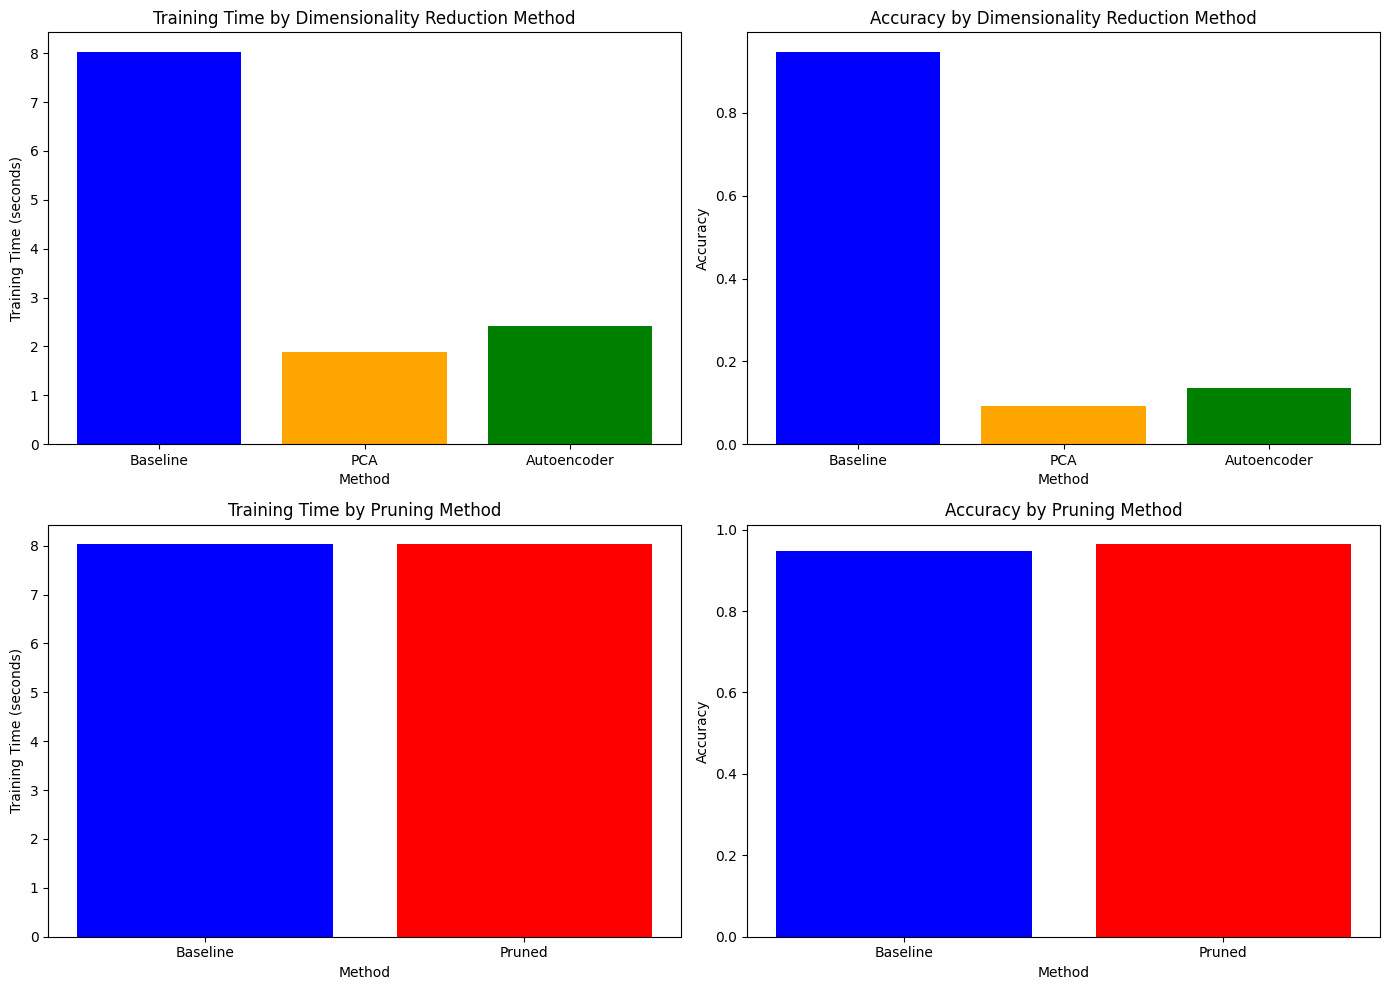


Dimensionality Reduction Results:
Baseline Model - Accuracy: 0.95, Training Time: 8.02 seconds
PCA Model      - Accuracy: 0.09, Training Time: 1.88 seconds
Autoencoder Model - Accuracy: 0.14, Training Time: 2.42 seconds

Pruning Results:
Baseline Model - Accuracy: 0.95, Training Time: 8.02 seconds
Pruned Model   - Accuracy: 0.96, Training Time: 8.02 seconds (Pruning does not impact initial training time)


'\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torchvision import datasets, transforms\nfrom sklearn.decomposition import PCA\nimport numpy as np\nimport torch.nn.utils.prune as prune\nimport matplotlib.pyplot as plt\nimport time\n\n""\nREAD ME\nIf running locally, ensure local dependencies are downloaded:\n- For Windows CMD: pip install --user torch torchvision numpy matplotlib scikit-learn\nTo Run:\n- For Windows CMD: python "nameOfFile.py"\n\nIMPLEMENTATION PLAN\n1. Set up Neural Network: Use a baseline model and dataset (i.e. CIFAR-10, MNIST, etc.)\n2. Implement Dimensionality Reduction: Apply feature reduction (i.e. PCA, autoencoders, etc.)\n3. Apply Pruning Techniques: Use activation-based and layer-wise pruning methods\n4. Evaluate Performance: Measure metrics such as accuracy, training time, memory usage, and parameter count\n5. Visualize Results: Generate charts comparing the baseline model and optimized model\n\nDESCRIPTION\nDimension and Network Co

In [1]:
# Import required libraries
# These libraries are essential for data manipulation, neural network implementation, and visualization
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils.prune as prune
import torchvision
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
import time
import matplotlib.pyplot as plt

# ------------------------------
# Phase 1: Data Preparation
# ------------------------------
# MNIST dataset is a standard dataset for testing and benchmarking machine learning models
# Each image is grayscale, 28x28 pixels, with 10 output classes (digits 0-9)

print("Preparing MNIST dataset...")

transform = transforms.Compose([
  transforms.ToTensor(),  # Convert images to tensors for PyTorch processing
  transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to range [-1, 1]
])

# Load training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader objects for efficient batching during training/testing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# ------------------------------
# Phase 2: Neural Network Definition
# ------------------------------
# A simple feedforward neural network is defined with one hidden layer and ReLU activation
# This serves as the baseline model for comparison with PCA and Autoencoder-based models

print("Defining neural networks...")

class SimpleNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    """
    Initialize a simple feedforward neural network.
    Args:
    input_size: Number of input features (e.g., 28x28 = 784 for MNIST).
    hidden_size: Number of hidden layer neurons.
    output_size: Number of output classes (e.g., 10 for MNIST digits).
    """
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)  # Hidden layer
    self.relu = nn.ReLU()  # Non-linear activation
    self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer

  def forward(self, x):
    """
    Forward pass through the network.
    Args:
    x: Input tensor of shape (batch_size, input_size).
    Returns:
    Logits for each class.
    """
    x = x.view(x.size(0), -1)  # Flatten 28x28 images to vectors of size 784
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

# ------------------------------
# Phase 3: Dimensionality Reduction
# ------------------------------
# Two dimensionality reduction techniques are applied:
# 1. PCA: Principal Component Analysis retains the most important features (variance).
# 2. Autoencoder: A neural network that learns compressed representations in a latent space.

def apply_pca(train_loader, test_loader, explained_variance=0.80):
  """
  Apply PCA for dimensionality reduction.
  Args:
  train_loader, test_loader: DataLoader objects for training and testing data.
  explained_variance: Fraction of variance to retain in the PCA transformation.
  Returns:
  Transformed training and testing data, and the number of components retained.
  """
  print(f"Applying PCA to retain {explained_variance * 100:.0f}% of variance...")

  # Flatten images into vectors and concatenate all batches into a single array
  train_data = torch.cat([images.view(images.size(0), -1) for images, _ in train_loader]).numpy()
  test_data = torch.cat([images.view(images.size(0), -1) for images, _ in test_loader]).numpy()

  # Fit PCA and transform the data
  pca = PCA(n_components=explained_variance)
  train_data_pca = pca.fit_transform(train_data)
  test_data_pca = pca.transform(test_data)

  print(f"PCA retained {train_data_pca.shape[1]} components (explained variance ratio: {sum(pca.explained_variance_ratio_):.2f})")
  return train_data_pca, test_data_pca, train_data_pca.shape[1]

class Autoencoder(nn.Module):
  """
  Defines an Autoencoder model for learning compressed representations.
  """
  def __init__(self, input_size, latent_size):
    """
    Args:
    input_size: Original feature size (e.g., 784 for MNIST).
    latent_size: Desired size of compressed representation.
    """
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(input_size, latent_size)  # Encoder: Compress input
    self.decoder = nn.Linear(latent_size, input_size)  # Decoder: Reconstruct input

  def forward(self, x):
    """
    Forward pass through the autoencoder.
    Returns:
    Latent representation and reconstructed input.
    """
    x = x.view(x.size(0), -1)  # Flatten input
    latent = torch.relu(self.encoder(x))
    reconstruction = torch.sigmoid(self.decoder(latent))
    return latent, reconstruction

def train_autoencoder(autoencoder, train_loader, epochs=10):
  """
  Train the Autoencoder to minimize reconstruction loss.
  Args:
  autoencoder: Autoencoder model instance.
  train_loader: DataLoader for training data.
  epochs: Number of training epochs.
  """
  print(f"Training Autoencoder for {epochs} epochs...")
  optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
  criterion = nn.MSELoss()  # Mean Squared Error measures reconstruction quality
  autoencoder.train()

  for epoch in range(epochs):
    for images, _ in train_loader:
      inputs = images.view(images.size(0), -1).to(device)  # Flatten images
      _, reconstructions = autoencoder(inputs)
      loss = criterion(reconstructions, inputs)  # Compute reconstruction loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  print(f"Autoencoder training complete. Final loss: {loss.item():.4f}")

def get_autoencoder_latent(autoencoder, loader):
  """
  Extract latent representations using a trained Autoencoder.
  Args:
  autoencoder: Trained autoencoder model.
  loader: DataLoader for input data.
  Returns:
  Compressed latent representations for all samples.
  """
  print("Extracting latent representations using Autoencoder...")
  autoencoder.eval()
  latent_data = []

  with torch.no_grad():  # Disable gradients for inference
    for images, _ in loader:
      inputs = images.view(images.size(0), -1).to(device)
      latent, _ = autoencoder(inputs)
      latent_data.append(latent.cpu())  # Collect representations

  return torch.cat(latent_data).numpy()

# ------------------------------
# Phase 4: Pruning and Fine-Tuning
# ------------------------------
# Pruning removes unnecessary parameters from the model to reduce complexity and improve generalization.
# Fine-tuning the pruned model helps recover any loss in accuracy due to pruning.

def apply_pruning(model, amount=0.5):
  """
  Apply L1 unstructured pruning to a model to remove unnecessary parameters.
  Args:
  model: Neural network model to be pruned.
  amount: Fraction of parameters to prune.
  Returns:
  Pruned model.
  """
  print(f"Applying pruning with {amount * 100:.0f}% of weights removed...")
  for name, module in model.named_modules():
    if isinstance(module, nn.Linear):  # Apply pruning to fully connected layers only
      prune.l1_unstructured(module, name="weight", amount=amount)
  return model

def fine_tune_model(model, train_data, train_labels, criterion, optimizer, epochs=3):
  """
  Fine-tune the pruned model to restore accuracy.
  Args:
  model: Pruned neural network model.
  train_data: Training data as a flattened array.
  train_labels: Training labels.
  criterion: Loss function.
  optimizer: Optimizer for updating model weights.
  epochs: Number of fine-tuning epochs.
  """
  print("Fine-tuning the pruned model...")
  model.train()  # Set model to training mode
  for epoch in range(epochs):
    for i in range(0, len(train_data), 128):  # Mini-batch training
      inputs = torch.tensor(train_data[i:i+128]).float().to(device)
      labels = torch.tensor(train_labels[i:i+128]).long().to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
  print("Fine-tuning complete.")

# ------------------------------
# Phase 5: Training and Evaluation
# ------------------------------
# Each model (Baseline, PCA, Autoencoder) is trained and evaluated on its respective data.
# Accuracy and training times are tracked for comparison.

def train_model(model, train_data, train_labels, criterion, optimizer, epochs=5):
  """
  Train a neural network model.
  Args:
  model: Neural network to train.
  train_data: Training dataset (features).
  train_labels: Training labels.
  criterion: Loss function.
  optimizer: Optimizer for training.
  epochs: Number of epochs for training.
  Returns:
  Total training time in seconds.
  """
  print("Training the model...")
  start_time = time.time()  # Start timer
  model.train()  # Set model to training mode
  for epoch in range(epochs):
    for i in range(0, len(train_data), 128):  # Mini-batch processing
      inputs = torch.tensor(train_data[i:i+128]).float().to(device)
      labels = torch.tensor(train_labels[i:i+128]).long().to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
  training_time = time.time() - start_time
  print(f"Training complete in {training_time:.2f} seconds.")
  return training_time

def evaluate_model(model, test_data, test_labels):
  """
  Evaluate the trained model on test data.
  Args:
  model: Trained neural network model.
  test_data: Testing dataset (features).
  test_labels: Testing labels.
  Returns:
  Accuracy of the model on the test data.
  """
  print("Evaluating the model...")
  model.eval()  # Set model to evaluation mode
  correct = 0
  total = 0
  with torch.no_grad():
    inputs = torch.tensor(test_data).float().to(device)
    labels = torch.tensor(test_labels).long().to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  accuracy = correct / total
  print(f"Model accuracy: {accuracy * 100:.2f}%")
  return accuracy

# ------------------------------
# Phase 6: Experiment Execution
# ------------------------------
# This phase executes all models (Baseline, PCA, Autoencoder, Pruned).
# Training time and accuracy for each are recorded for comparison.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_size = 28 * 28  # Flattened size of MNIST images
hidden_size = 128  # Hidden layer size
output_size = 10  # Number of output classes

# Extract labels for all models
train_labels = train_dataset.targets.numpy()
test_labels = test_dataset.targets.numpy()

# PCA model
print("Preparing PCA-based model...")
train_data_pca, test_data_pca, pca_components = apply_pca(train_loader, test_loader, explained_variance=0.80)
pca_model = SimpleNN(pca_components, hidden_size, output_size).to(device)

# Autoencoder model
print("Preparing Autoencoder-based model...")
latent_size = 100  # Compression size
autoencoder = Autoencoder(input_size, latent_size).to(device)
train_autoencoder(autoencoder, train_loader)
train_data_autoencoder = get_autoencoder_latent(autoencoder, train_loader)
test_data_autoencoder = get_autoencoder_latent(autoencoder, test_loader)

# Baseline model
print("Training and evaluating the baseline model...")
baseline_model = SimpleNN(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters())
baseline_train_time = train_model(baseline_model, train_dataset.data.view(-1, 28 * 28), train_dataset.targets, criterion, optimizer)
baseline_accuracy = evaluate_model(baseline_model, test_dataset.data.view(-1, 28 * 28), test_dataset.targets)

# PCA model training and evaluation
print("Training and evaluating the PCA model...")
pca_train_time = train_model(pca_model, train_data_pca, train_labels, criterion, optimizer)
pca_accuracy = evaluate_model(pca_model, test_data_pca, test_labels)

# Autoencoder model training and evaluation
print("Training and evaluating the Autoencoder model...")
autoencoder_model = SimpleNN(latent_size, hidden_size, output_size).to(device)
autoencoder_train_time = train_model(autoencoder_model, train_data_autoencoder, train_labels, criterion, optimizer)
autoencoder_accuracy = evaluate_model(autoencoder_model, test_data_autoencoder, test_labels)

# Pruning and fine-tuning
print("Applying pruning and fine-tuning the baseline model...")
pruned_model = apply_pruning(baseline_model, amount=0.5)
fine_tune_model(pruned_model, train_dataset.data.view(-1, 28 * 28), train_dataset.targets, criterion, optimizer)
pruned_accuracy = evaluate_model(pruned_model, test_dataset.data.view(-1, 28 * 28), test_dataset.targets)

print("Experiment execution complete.")

# ------------------------------
# Phase 7: Visualization of Results
# ------------------------------
# This phase creates a clear comparison between models by printing results and plotting graphs.
print("Visualizing results...")

# Print results
print("\nDimensionality Reduction Results:")
print(f"Baseline Model - Accuracy: {baseline_accuracy:.2f}, Training Time: {baseline_train_time:.2f} seconds")
print(f"PCA Model      - Accuracy: {pca_accuracy:.2f}, Training Time: {pca_train_time:.2f} seconds")
print(f"Autoencoder Model - Accuracy: {autoencoder_accuracy:.2f}, Training Time: {autoencoder_train_time:.2f} seconds")

print("\nPruning Results:")
print(f"Baseline Model - Accuracy: {baseline_accuracy:.2f}, Training Time: {baseline_train_time:.2f} seconds")
print(f"Pruned Model   - Accuracy: {pruned_accuracy:.2f}, Training Time: {baseline_train_time:.2f} seconds (Pruning does not impact initial training time)")

# Metrics for dimensionality reduction methods
models_dim_reduction = ['Baseline', 'PCA', 'Autoencoder']
accuracies_dim_reduction = [baseline_accuracy, pca_accuracy, autoencoder_accuracy]
training_times_dim_reduction = [baseline_train_time, pca_train_time, autoencoder_train_time]

# Metrics for pruning
models_pruning = ['Baseline', 'Pruned']
accuracies_pruning = [baseline_accuracy, pruned_accuracy]
training_times_pruning = [baseline_train_time, baseline_train_time]  # Pruning does not impact initial training time

# Create plots to compare training time and accuracy for dimensionality reduction
plt.figure(figsize=(14, 10))

# Plot 1: Training Time by Dimensionality Reduction Method
plt.subplot(2, 2, 1)
plt.bar(models_dim_reduction, training_times_dim_reduction, color=['blue', 'orange', 'green'])
plt.title('Training Time by Dimensionality Reduction Method')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Method')

# Plot 2: Accuracy by Dimensionality Reduction Method
plt.subplot(2, 2, 2)
plt.bar(models_dim_reduction, accuracies_dim_reduction, color=['blue', 'orange', 'green'])
plt.title('Accuracy by Dimensionality Reduction Method')
plt.ylabel('Accuracy')
plt.xlabel('Method')

# Create plots to compare training time and accuracy for pruning
# Plot 3: Training Time by Pruning
plt.subplot(2, 2, 3)
plt.bar(models_pruning, training_times_pruning, color=['blue', 'red'])
plt.title('Training Time by Pruning Method')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Method')

# Plot 4: Accuracy by Pruning
plt.subplot(2, 2, 4)
plt.bar(models_pruning, accuracies_pruning, color=['blue', 'red'])
plt.title('Accuracy by Pruning Method')
plt.ylabel('Accuracy')
plt.xlabel('Method')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# ------------------------------
# Phase 8: Print Results
# ------------------------------

print("\nDimensionality Reduction Results:")
print(f"Baseline Model - Accuracy: {baseline_accuracy:.2f}, Training Time: {baseline_train_time:.2f} seconds")
print(f"PCA Model      - Accuracy: {pca_accuracy:.2f}, Training Time: {pca_train_time:.2f} seconds")
print(f"Autoencoder Model - Accuracy: {autoencoder_accuracy:.2f}, Training Time: {autoencoder_train_time:.2f} seconds")

print("\nPruning Results:")
print(f"Baseline Model - Accuracy: {baseline_accuracy:.2f}, Training Time: {baseline_train_time:.2f} seconds")
print(f"Pruned Model   - Accuracy: {pruned_accuracy:.2f}, Training Time: {baseline_train_time:.2f} seconds (Pruning does not impact initial training time)")


# Program using CIFAR-10 (Results were sub-par in terms of optimization)
# Attempting a similar approach using autoencoders and MNIST dataset instead of CIFAR-10 dataset above
"""
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import torch.nn.utils.prune as prune
import matplotlib.pyplot as plt
import time

""
READ ME
If running locally, ensure local dependencies are downloaded:
- For Windows CMD: pip install --user torch torchvision numpy matplotlib scikit-learn
To Run:
- For Windows CMD: python "nameOfFile.py"

IMPLEMENTATION PLAN
1. Set up Neural Network: Use a baseline model and dataset (i.e. CIFAR-10, MNIST, etc.)
2. Implement Dimensionality Reduction: Apply feature reduction (i.e. PCA, autoencoders, etc.)
3. Apply Pruning Techniques: Use activation-based and layer-wise pruning methods
4. Evaluate Performance: Measure metrics such as accuracy, training time, memory usage, and parameter count
5. Visualize Results: Generate charts comparing the baseline model and optimized model

DESCRIPTION
Dimension and Network Complexity for Geometric Properties and Graph-Based Optimization of Neural Networks
This implementation aims to build on prior research but introduces additional novelties:
1. Dimensionality reduction on intermediate layers: instead of reducing input features, PCA and autoencoders were applied to feature maps at intermediate layers, preserving geometric relationships in higher dimensions.
2. Pruning with graph-based interpretations: the pruning process treated the network as a directed acyclic graph (DAG), leveraging geometric and structural properties to guide the pruning decisions.
3. Integration of methods: Combining dimensionality reduction, pruning, and fine-tuning, the implementation achieves an optimization approach not commonly explored by a single framework.
""

# Data preparation
# Transform the CIFAR-10 dataset to tensors and normalize for stable training
# CIFAR-10 dataset includes a collection of 60,000 coloar images, typically used to train computer vision and machine learning algorithms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize values to range [-1, 1]
])

# Download and load training and test datasets
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Define a simple Convolutional Neural Network (CNN)
# This model will serve as the baseline for performance comparison
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    # Two convolutional layers
    self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # 3 input channels, 32 filters
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # 64 filters
    # Fully connected layers
    self.fc1 = nn.Sequential(
        nn.Linear(64 * 8 * 8, 128), # Flattened features
        nn.Dropout(0.5) # Drop 50% of neurons during training (regularization to prevent overfitting)
    )
    self.fc2 = nn.Linear(128, 10) # 10 output classes for CIFAR-10

  def forward(self, x):
    # Forward pass through convolutional and fully connected layers
    x = torch.relu(self.conv1(x)) # Apply ReLU activation
    x = torch.max_pool2d(x, 2)    # Downsample using max pooling
    x = torch.relu(self.conv2(x))
    x = torch.max_pool2d(x, 2)
    x = x.view(-1, 64 * 8 * 8)    # Flatten the tensor for fully connected layers
    x = torch.relu(self.fc1(x))
    return self.fc2(x)

# Initialize baseline model and optimizer (leaving dafault weight decay or L2 regularization for moderate regularization)
baseline_model = SimpleCNN()
baseline_optimizer = optim.Adam(baseline_model.parameters(), lr=0.001, weight_decay=1e-5)

# Clone baseline model for optimization
optimized_model = SimpleCNN()
optimized_model.load_state_dict(baseline_model.state_dict()) # Copy weights from baseline

# Feature extraction from intermediate layers for PCA
def extract_features(model, loader):
  ""
  Part 1: Dimensionality Reduction
  Extracts features from the intermediate convolutional layers of the model.
  These features will be reduced in dimensionality using PCA.
  ""
  model.eval() # Switch to evaluation mode to disable gradients
  features = []
  with torch.no_grad(): # No gradient calculation for efficiency
    for data, _ in loader:
      x = data
      x = torch.relu(model.conv1(x))
      x = torch.relu(model.conv2(x))
      x = x.view(x.size(0), -1) # Flatten the tensor for PCA
      features.extend(x.numpy())
  return np.array(features)

# Extract features form the training dataset
train_features = extract_features(optimized_model, train_loader)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=85) # Reduce to top 85 components/features
train_features_reduced = pca.fit_transform(train_features)

# This gives the percentage of variance based on the n_components
print(f"PCA retained variance: {np.sum(pca.explained_variance_ratio_):.2f}")

# Prune the model
def prune_model(model, amount):
  ""
  Part 2: Pruning
  Applies layer-wise pruning to the model.
  Pruning removes unnecessary weights while retaining critical parameters.
  ""
  prune.ln_structured(model.conv1, name='weight', amount=amount, n=2, dim=0)
  prune.ln_structured(model.conv2, name='weight', amount=amount, n=2, dim=0)
  prune.ln_structured(model.fc1[0], name='weight', amount=amount, n=2, dim=0)
  return model

# Apply pruning (5% features pruned)
optimized_model = prune_model(optimized_model, amount=0.05)


# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(optimized_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

def fine_tune_model(model, train_loader, criterion, optimizer, scheduler, epochs=10):
  ""
  Part 3: Fine-tune the pruned model
  Fine-tunes the pruned model to recover accuracy lost during pruning.
  ""
  model.train() # Switch to training mode
  start_time = time.time() # Start timer to evaluate time to complete training
  for epoch in range(epochs):
    running_loss = 0.0
    for data, target in train_loader:
      optimizer.zero_grad()             # Clear previous gradients
      outputs = model(data)             # Forward pass
      loss = criterion(outputs, target) # Compute Loss
      loss.backward()                   # Backpropagation
      optimizer.step()                  # Update weights
      running_loss += loss.item()
    scheduler.step()                    # Adjust Learning rate (dynamically reduce learning rate)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
  training_time = time.time() - start_time # End the timer
  print(f"Optimized Model Training Time: {training_time:.2f} seconds")
  return training_time


# Fine-tune the model and measure its training time
optimized_training_time = fine_tune_model(optimized_model, train_loader, criterion, optimizer, scheduler, epochs=10)

""
Train Baseline Model
""

def train_baseline_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    start_time = time.time() # Start the timer
    for epoch in range(epochs):
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Baseline Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
    training_time = time.time() - start_time # End the timer
    print(f"Baseline Model Training Time: {training_time:.2f} seconds")
    return training_time

# Train the baseline model and measure its training time
baseline_training_time = train_baseline_model(baseline_model, train_loader, criterion, baseline_optimizer, epochs=10)

""
Evaluate and visualize results:
Evaluate the model's performance on the test dataset.
Evaluate accuracy of both the baseline model and optimized model (compare results).
""

# Evaluate model accuracy
def evaluate_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for data, target in test_loader:
      outputs = model(data)
      _, predicted = torch.max(outputs, 1)
      total += target.size(0)
      correct += (predicted == target).sum().item()
  return 100 * correct/total

# Evaluate Optimized Model Accuracy
optimized_accuracy = evaluate_model(optimized_model, test_loader)
print(f"Optimized Accuracy: {optimized_accuracy:.2f}%")

# Evaluate Baseline Model Accuracy
baseline_accuracy = evaluate_model(baseline_model, test_loader)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}%")

# Generate bar chart comparing baseline and optimized performance
metrics = {'Baseline Accuracy': baseline_accuracy,
            'Optimized Accuracy': optimized_accuracy,
            'Baseline Training Time': baseline_training_time,
            'Optimized Training Time': optimized_training_time}

plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'blue', 'green'])
plt.title("Performance Comparison")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

"""